In [79]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [80]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [81]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [82]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [83]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(autoload_with = engine)

In [84]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [85]:
# Save references to each table
Station = Base.classes.station
Measurement = Base.classes.measurement

In [86]:
# Create our session (link) from Python to the DB
session = Session(bind = engine)

# Exploratory Precipitation Analysis

In [110]:
# Find the most recent date in the data set.
recent_date =session.query(Measurement.date).order_by(Measurement.date.desc()).first()
print(date)

('2017-08-23',)


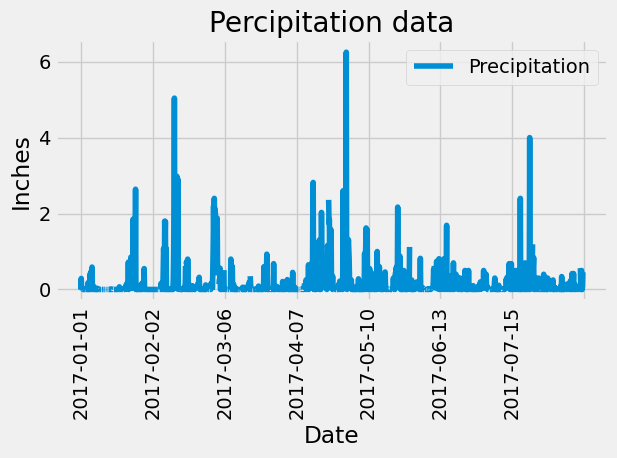

In [198]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
recent_date
# Calculate the date one year from the last date in data set.
year_ago_date = dt.date(2017,8,23) - dt.timedelta(days=365)
year_ago_date
# Perform a query to retrieve the data and precipitation scores
prcp_data = session.query(Measurement.prcp , Measurement.date).\
    filter(Measurement.date > '2016-8-23').\
    order_by(Measurement.date).all()
prcp_data

# Save the query results as a Pandas DataFrame. Explicitly set the column names
prcp_df= pd.DataFrame(prcp_data, columns = ['Precipitation', 'Date'])

# Sort the dataframe by date
prcp_df.set_index('Date')

# Use Pandas Plotting with Matplotlib to plot the data
prcp_df.plot(x = 'Date', y = 'Precipitation')

for bar in bars:
    height = bar.get_height()


plt.xlabel('Date')
plt.ylabel('Inches')
plt.title('Percipitation data')
plt.xticks(rotation=90)


plt.tight_layout()
plt.show()

In [201]:
# Use Pandas to calculate the summary statistics for the precipitation data
prcp_df.describe()

,Precipitation
count,1267.000000
mean,0.165927
std,0.453913
min,0.000000
25%,0.000000
50%,0.000000
75%,0.105000
max,6.250000


# Exploratory Station Analysis

In [203]:
# Design a query to calculate the total number of stations in the dataset
station_total = session.query(Station.station).count()
station_total

9

In [210]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
active_stations = session.query(Measurement.station , func.count(Measurement.station)).group_by( Measurement.station ).\
               order_by(func.count(Measurement.station).desc()).all()
active_stations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [214]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
active_stations_stats = session.query(func.min(Measurement.tobs), func.max(Measurement.tobs),\
                      func.avg(Measurement.tobs)).\
                      filter(Measurement.station == 'USC00519281' ).all()
active_stations_stats

[(54.0, 85.0, 71.66378066378067)]

In [218]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
temp_data = session.query(Measurement.tobs , Measurement.date).\
    filter(Measurement.station == 'USC00519281').all()




# Close Session

In [16]:
# Close Session
session.close()